Importing the data set
--

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

df = pd.read_csv("/Users/vincenzorocchi/Desktop/DataMining_project_RAVDESS/Ravdess/ravdess_features.csv")

df.shape
#df_copy = df.copy() #making a copy to work with 

(2452, 38)

Preliminary data analysis
--

In [2]:
df.head()


,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,audio-only,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,audio-only,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,audio-only,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,audio-only,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [3]:
df.tail()


,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
2447,audio-only,speech,calm,strong,Kids are talking by the door,1st,23.0,M,1,2,48000,2,4605,221021.0,NaN,9871,-30.225578,158.84550,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,1.0,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2448,audio-only,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M,1,2,48000,2,4171,200200.0,-43.342901,8963,-31.160332,157.49970,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,1.0,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2449,audio-only,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M,1,2,48000,2,5239,251451.0,NaN,9765,-26.135280,138.13321,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,1.0,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821
2450,audio-only,speech,surprised,normal,Kids are talking by the door,1st,NaN,M,1,2,48000,2,3737,179379.0,-45.751265,9716,-28.242815,159.94340,-868.09576,219.84350,5524.736973,3596.031841,760.822547,11981.912464,-1.465594,0.206481,0.578854,0.308684,0.001565,1.0,-1.277117,-0.242668,-4.400898e-06,0.005182,-0.057556,0.052002,13.855588,-0.110966
2451,audio-only,NaN,neutral,normal,Dogs are sitting by the door,2nd,23.0,M,1,2,48000,2,3837,184184.0,-40.018044,9427,-29.019236,149.18895,-799.51010,219.52780,6082.676123,3963.725117,0.000000,12199.773419,-1.501387,0.147574,0.554946,0.320787,0.000000,1.0,-1.257666,-0.237757,6.342640e-07,0.010001,-0.081512,0.103027,12.973181,1.032081


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   modality             2452 non-null   object 
 1   vocal_channel        2256 non-null   object 
 2   emotion              2452 non-null   object 
 3   emotional_intensity  2452 non-null   object 
 4   statement            2452 non-null   object 
 5   repetition           2452 non-null   object 
 6   actor                1326 non-null   float64
 7   sex                  2452 non-null   object 
 8   channels             2452 non-null   int64  
 9   sample_width         2452 non-null   int64  
 10  frame_rate           2452 non-null   int64  
 11  frame_width          2452 non-null   int64  
 12  length_ms            2452 non-null   int64  
 13  frame_count          2452 non-null   float64
 14  intensity            1636 non-null   float64
 15  zero_crossings_sum   2452 non-null   i

In [5]:
df.dtypes

modality                object
vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
actor                  float64
sex                     object
channels                 int64
sample_width             int64
frame_rate               int64
frame_width              int64
length_ms                int64
frame_count            float64
intensity              float64
zero_crossings_sum       int64
mfcc_mean              float64
mfcc_std               float64
mfcc_min               float64
mfcc_max               float64
sc_mean                float64
sc_std                 float64
sc_min                 float64
sc_max                 float64
sc_kur                 float64
sc_skew                float64
stft_mean              float64
stft_std               float64
stft_min               float64
stft_max               float64
stft_kur               float64
stft_skew              float64
mean    

In [6]:
df.describe()

,actor,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
count,1326.000000,2452.000000,2452.0,2452.0,2452.000000,2452.000000,2452.000000,1636.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.0,2452.000000,2452.000000,2.452000e+03,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000
mean,12.582202,1.002447,2.0,48000.0,2.004894,4092.151305,193587.188010,-37.625332,12885.314029,-28.769180,136.777233,-758.909381,199.182514,5170.101398,3365.453393,551.834124,11830.461864,-1.142642,0.348442,0.475846,0.331371,0.002272,1.0,-1.247929,0.112889,1.393649e-08,0.020504,-0.164871,0.179839,11.203002,-0.048245
std,6.916240,0.049416,0.0,0.0,0.098833,598.321526,36825.369056,8.451982,3665.319584,4.461886,20.451689,99.945452,26.002107,875.185444,580.479034,508.025890,1004.955976,0.572654,0.353005,0.082551,0.023773,0.004830,0.0,0.211781,0.330759,4.267587e-05,0.021024,0.175443,0.195539,6.614859,0.454925
min,1.000000,1.000000,2.0,48000.0,2.000000,2936.000000,-1.000000,-63.864613,4721.000000,-43.812923,83.621370,-1085.479700,126.250810,2360.880942,1491.341071,0.000000,7657.495158,-1.795576,-0.510390,0.214089,0.210126,0.000000,1.0,-1.669603,-0.993957,-9.435575e-04,0.000652,-0.998810,0.004669,1.757794,-2.356526
25%,7.000000,1.000000,2.0,48000.0,2.000000,3604.000000,172972.000000,-43.539869,10362.500000,-31.828597,122.623928,-826.464075,180.081417,4563.684781,3025.431971,0.000000,11516.034429,-1.496187,0.098549,0.415260,0.317780,0.000000,1.0,-1.390612,-0.094334,-1.394488e-06,0.006791,-0.202431,0.055489,6.519988,-0.336624
50%,13.000000,1.000000,2.0,48000.0,2.000000,4004.000000,190591.000000,-37.072745,12383.500000,-28.681109,136.523810,-760.983065,201.697175,5122.712259,3433.835368,707.319256,12000.292653,-1.308938,0.347621,0.475740,0.334224,0.000190,1.0,-1.292105,0.126065,-9.810701e-08,0.013880,-0.103775,0.109726,9.828686,0.004256
75%,19.000000,1.000000,2.0,48000.0,2.000000,4538.000000,217817.000000,-31.591309,14966.000000,-25.550238,151.385135,-692.890015,218.185288,5775.959809,3768.503344,977.693852,12091.886054,-0.982944,0.557427,0.530571,0.349272,0.001999,1.0,-1.152519,0.335574,8.363511e-07,0.026154,-0.054352,0.224487,14.085435,0.262978
max,24.000000,2.000000,2.0,48000.0,4.000000,6373.000000,305906.000000,-16.353953,30153.000000,-15.491450,195.942920,-461.489320,280.173700,7655.335726,4819.783069,2121.417965,17477.540047,3.657953,1.825436,0.724077,0.391928,0.039378,1.0,0.794669,1.465815,1.222810e-03,0.152168,-0.006134,0.999146,59.085695,1.799676


In [7]:
df.skew()

/var/folders/qm/__jn31fj4rj1h58mlnf1xsbm0000gn/T/ipykernel_67459/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


actor                  0.000739
channels              20.153560
sample_width           0.000000
frame_rate             0.000000
frame_width           20.153560
length_ms              0.565604
frame_count           -1.672222
intensity             -0.177906
zero_crossings_sum     0.739975
mfcc_mean             -0.088020
mfcc_std              -0.009862
mfcc_min              -0.022158
mfcc_max              -0.158560
sc_mean                0.079434
sc_std                -0.507997
sc_min                 0.111215
sc_max                 0.445674
sc_kur                 2.797695
sc_skew                0.388395
stft_mean              0.112054
stft_std              -0.682119
stft_min               3.427599
stft_max               0.000000
stft_kur               2.044365
stft_skew             -0.113172
mean                   6.048052
std                    2.296649
min                   -2.265461
max                    2.206835
kur                    2.056925
skew                  -0.433816
dtype: f

In [8]:
df.kurt()

/var/folders/qm/__jn31fj4rj1h58mlnf1xsbm0000gn/T/ipykernel_67459/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


actor                  -1.197387
channels              404.495923
sample_width            0.000000
frame_rate              0.000000
frame_width           404.495923
length_ms              -0.212899
frame_count             9.052750
intensity              -0.178440
zero_crossings_sum      0.876642
mfcc_mean              -0.220489
mfcc_std               -0.416659
mfcc_min               -0.132143
mfcc_max               -0.495591
sc_mean                -0.288740
sc_std                  0.117022
sc_min                 -1.409962
sc_max                  4.618472
sc_kur                 11.894999
sc_skew                 0.341848
stft_mean              -0.424567
stft_std                0.419935
stft_min               13.965642
stft_max                0.000000
stft_kur               10.311647
stft_skew              -0.062095
mean                  398.332687
std                     6.370971
min                     5.636069
max                     5.076158
kur                     7.759895
skew      

Dropping modality
---

In [9]:
print(pd.unique(df["modality"])) #checking for unique values
#or
print(df["modality"].value_counts())
#then
df.drop(["modality"], axis = 1, inplace = True) #eliminating the modality column - unnecesary


['audio-only']
audio-only    2452
Name: modality, dtype: int64


Missing values
---

In [10]:
print(df.isna().any()) #checking for missing values

print(df.isna().sum()) #printing the totals of the missing values

vocal_channel           True
emotion                False
emotional_intensity    False
statement              False
repetition             False
actor                   True
sex                    False
channels               False
sample_width           False
frame_rate             False
frame_width            False
length_ms              False
frame_count            False
intensity               True
zero_crossings_sum     False
mfcc_mean              False
mfcc_std               False
mfcc_min               False
mfcc_max               False
sc_mean                False
sc_std                 False
sc_min                 False
sc_max                 False
sc_kur                 False
sc_skew                False
stft_mean              False
stft_std               False
stft_min               False
stft_max               False
stft_kur               False
stft_skew              False
mean                   False
std                    False
min                    False
max           

In [11]:
#for column in df_copy.columns: #visualizing the null values in percentage
    #percentage = df_copy[column].isnull().mean()
   # print(f'{column}: {round(percentage*100, 2)}%')
    
def percentage_missing(df):
    percent_nan = round(100  * df.isnull().sum() / len(df), 2)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percentage_missing(df)
percent_nan

vocal_channel     7.99
intensity        33.28
actor            45.92
dtype: float64

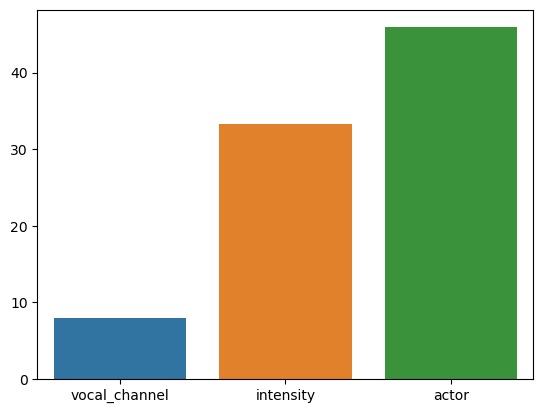

In [12]:
sns.barplot(x = percent_nan.index, y= percent_nan)
plt.show()

Dividing the statistical part from the descriptive part
---

In [13]:
#df_nostat = df.copy() #copying
df_yestat = df.iloc[0:,14:]
df_yestat["index"] = range(1, len(df_yestat) + 1)
df_yestat = df_yestat.set_index("index") #setting "index" (column) as index

df_nostat = df.iloc[0:,:14]
df_nostat["index"] = range(1, len(df_nostat) + 1) #adding index columns
df_nostat = df_nostat.set_index("index") #setting "index" (column) as index

In [14]:
#code to identify the columns and then drop them - used other method to split dataset

#print(df.columns.get_loc("zero_crossings_sum"))
#print(df.columns.get_loc("skew"))

# df_nostat.drop(df.columns[14:37], axis = 1, inplace = True)

In [15]:
df_nostat.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity
index,,,,,,,,,,,,,,
1,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,3737,179379.0,-36.793432
2,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,1,2,48000,2,3904,187387.0,NaN
3,NaN,happy,strong,Dogs are sitting by the door,2nd,16.0,F,1,2,48000,2,4671,224224.0,-32.290737
4,NaN,surprised,normal,Kids are talking by the door,1st,14.0,F,1,2,48000,2,3637,174575.0,-49.019839
5,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,1,2,48000,2,4404,211411.0,-31.214503


In [16]:
df_nostat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 1 to 2452
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2256 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                1326 non-null   float64
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   sample_width         2452 non-null   int64  
 9   frame_rate           2452 non-null   int64  
 10  frame_width          2452 non-null   int64  
 11  length_ms            2452 non-null   int64  
 12  frame_count          2452 non-null   float64
 13  intensity            1636 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 287.3+ KB


ASSIGNING MAPS TO CATEGORICAL VALUES AND CONVERTING THEM INTO NUMERICAL ONES - for later plotting - DF_NOSTAT

In [17]:
#checking the categorical attributes and their unique values to discretize them

print(pd.unique(df["emotion"]))
print(pd.unique(df["vocal_channel"]))
print(pd.unique(df["emotional_intensity"]))
print(pd.unique(df["repetition"]))
print(pd.unique(df["statement"]))
print(pd.unique(df["sex"]))

['fearful' 'angry' 'happy' 'surprised' 'neutral' 'calm' 'sad' 'disgust']
['speech' nan 'song']
['normal' 'strong']
['2nd' '1st']
['Dogs are sitting by the door' 'Kids are talking by the door']
['F' 'M']


In [18]:
#defining the maps to convert the word variables in numerical ones

vocal_map = {"speech": 0, "song": 1}
emotional_int_map = {"normal": 0, "strong" :1}
repetition_map = {"1st": 0, "2nd" :1}
sex_map = {"F": 0, "M" :1}
statement_map = {"Dogs are sitting by the door" :1, "Kids are talking by the door":0}
emotion_map = {'fearful':5, 'angry':4, 'happy':2, 'surprised':7, 'neutral':0, 'calm':1, 'sad':3, 'disgust':6}

In [19]:
#replacing the maps and creating the corr graph

df_nostat.replace({"vocal_channel": vocal_map,
            "emotional_intensity": emotional_int_map,
            "repetition": repetition_map,
            "sex": sex_map,
            "statement": statement_map,
            "emotion" : emotion_map}, inplace = True)

In [20]:
# Checking categorical columns if any exist, after conversion
df_nostat.dtypes[df_nostat.dtypes == "object"]

Series([], dtype: object)

DEALING WITH MISSING VALUES - DF_NOSTAT - vocal_channel - intensity - actor
--

In [21]:
#checking for eye-balling correlation of the null values with other attributes

df_nostat[df_nostat["actor"].isna()]

df_nostat[df_nostat["vocal_channel"].isna()]

df_nostat[df_nostat["intensity"].isna()]

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity
index,,,,,,,,,,,,,,
2,0.0,4,0,1,0,16.0,0,1,2,48000,2,3904,187387.0,NaN
7,0.0,4,0,1,0,2.0,0,1,2,48000,2,3770,180980.0,NaN
10,1.0,3,1,1,1,12.0,0,1,2,48000,2,4371,209810.0,NaN
11,1.0,3,1,1,1,NaN,0,1,2,48000,2,4438,213013.0,NaN
12,0.0,0,0,1,1,NaN,0,1,2,48000,2,3637,174575.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,0.0,4,0,0,0,7.0,1,1,2,48000,2,4004,192192.0,NaN
2445,0.0,0,0,0,1,NaN,1,1,2,48000,2,3504,168168.0,NaN
2446,0.0,7,1,1,0,NaN,1,1,2,48000,2,3237,155356.0,NaN


WORKING ON: "VOCAL_CHANNEL"

In [22]:
print(df_nostat["vocal_channel"].value_counts())

0.0    1335
1.0     921
Name: vocal_channel, dtype: int64


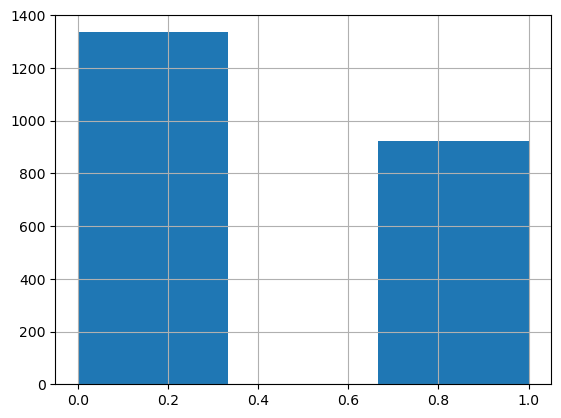

In [23]:
df_nostat['vocal_channel'].hist(bins=3)
plt.show()

In [24]:
df_nostat['vocal_channel'].fillna(df_nostat['vocal_channel'].mode()[0], inplace=True)

In [25]:
df_nostat["vocal_channel"].isna().sum()

0

WORKING ON: "INTENSITY"

In [26]:
print(df_nostat["intensity"].value_counts())

-47.386438    7
-46.787174    7
-45.012642    7
-46.172481    7
-36.522822    7
             ..
-29.910065    1
-29.132889    1
-34.559789    1
-45.649076    1
-29.512788    1
Name: intensity, Length: 989, dtype: int64


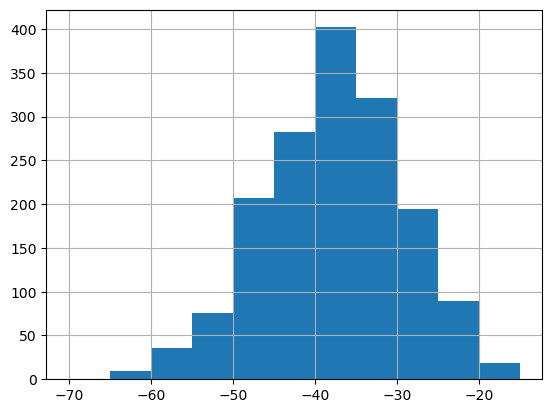

In [27]:
df_nostat['intensity'].hist(bins=np.arange(-70,-10,5))
plt.show()

In [28]:
df_nostat['intensity'] = df_nostat['intensity'].groupby(
    [df_nostat['emotional_intensity'], df_nostat["vocal_channel"], df_nostat['emotion']]).apply(lambda x: x.fillna(x.mean()))
df_nostat['intensity'].groupby(
    [df_nostat['emotional_intensity'], df_nostat["vocal_channel"], df_nostat['emotion']]).mean()

emotional_intensity  vocal_channel  emotion
0                    0.0            0         -46.112212
                                    1         -48.044535
                                    2         -40.756993
                                    3         -48.324942
                                    4         -36.663681
                                    5         -40.431263
                                    6         -44.372406
                                    7         -40.995773
                     1.0            0         -37.407659
                                    1         -39.059685
                                    2         -33.632325
                                    3         -38.660568
                                    4         -31.828173
                                    5         -37.385224
1                    0.0            1         -47.596807
                                    2         -30.971452
                                    3       

In [29]:
df_nostat['intensity'].describe()

count    2452.000000
mean      -37.636534
std         7.881926
min       -63.864613
25%       -42.850759
50%       -37.407659
75%       -31.828173
max       -16.353953
Name: intensity, dtype: float64

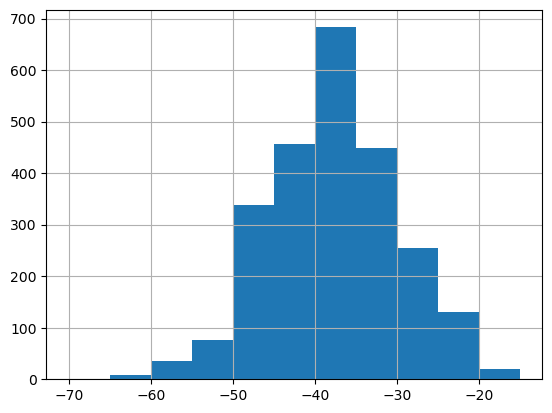

In [30]:
df_nostat['intensity'].hist(bins=np.arange(-70,-10,5))
plt.show()

WORKING ON: "ACTOR" - missing values at 48% of total - no significant enough correlation found to fill the missing values - dropping the column

In [31]:
df_nostat.corr()["actor"].sort_values()

sex                   -0.069798
emotion               -0.028649
channels              -0.021199
frame_width           -0.021199
emotional_intensity   -0.018823
statement             -0.005819
vocal_channel         -0.003217
repetition            -0.002870
intensity              0.031179
frame_count            0.039325
length_ms              0.043038
actor                  1.000000
sample_width                NaN
frame_rate                  NaN
Name: actor, dtype: float64

In [32]:
df_nostat.drop(["actor"], axis = 1, inplace=True) #

CHECKING THE DATASET AFTER DEALING WITH MISSING VALUES

In [33]:
df_nostat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 1 to 2452
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   float64
 1   emotion              2452 non-null   int64  
 2   emotional_intensity  2452 non-null   int64  
 3   statement            2452 non-null   int64  
 4   repetition           2452 non-null   int64  
 5   sex                  2452 non-null   int64  
 6   channels             2452 non-null   int64  
 7   sample_width         2452 non-null   int64  
 8   frame_rate           2452 non-null   int64  
 9   frame_width          2452 non-null   int64  
 10  length_ms            2452 non-null   int64  
 11  frame_count          2452 non-null   float64
 12  intensity            2452 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 268.2 KB


In [34]:
df_nostat.corr(method="pearson").style.background_gradient(cmap='coolwarm',
                                                               vmin=-1, vmax=1, axis=None,).format(precision=3)

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity
vocal_channel,1.000,-0.228,-0.010,0.006,0.009,0.031,-0.021,nan,nan,-0.021,0.724,0.553,0.289
emotion,-0.228,1.000,0.126,0.000,0.000,-0.005,-0.016,nan,nan,-0.016,-0.267,-0.188,0.222
emotional_intensity,-0.010,0.126,1.000,-0.000,0.000,-0.000,-0.046,nan,nan,-0.046,0.114,0.092,0.406
statement,0.006,0.000,-0.000,1.000,-0.000,0.000,-0.000,nan,nan,-0.000,-0.030,-0.057,0.035
repetition,0.009,0.000,0.000,-0.000,1.000,-0.000,0.017,nan,nan,0.017,0.016,0.027,0.015
sex,0.031,-0.005,-0.000,0.000,-0.000,1.000,-0.001,nan,nan,-0.001,-0.072,-0.056,-0.067
channels,-0.021,-0.016,-0.046,-0.000,0.017,-0.001,1.000,nan,nan,1.000,-0.011,-0.005,-0.050
sample_width,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
frame_rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
frame_width,-0.021,-0.016,-0.046,-0.000,0.017,-0.001,1.000,nan,nan,1.000,-0.011,-0.005,-0.050


Modifying the data type for the "vocal_channel" column - float to int


In [35]:
print(df_nostat["vocal_channel"].dtypes)

df_nostat["vocal_channel"] = df_nostat["vocal_channel"].astype(int)

float64


Logical correlation - plotting - nostat
---
missing values = adressed

frame_width, channels and frame_count have probably errors in the report

In [36]:
#df_nostat['emotional_intensity'].value_counts().plot(kind='bar', 
#                                   title='normal and strong emotional int.')
#plt.show()

#df_nostat['vocal_channel'].value_counts().plot(kind='bar', 
#                                   title='spoke vs singed')
#plt.show()

#df_nostat['emotion'].value_counts().plot(kind='bar', 
#                                  title='emotions expressed',)
#plt.show()

<AxesSubplot:xlabel='emotion', ylabel='count'>

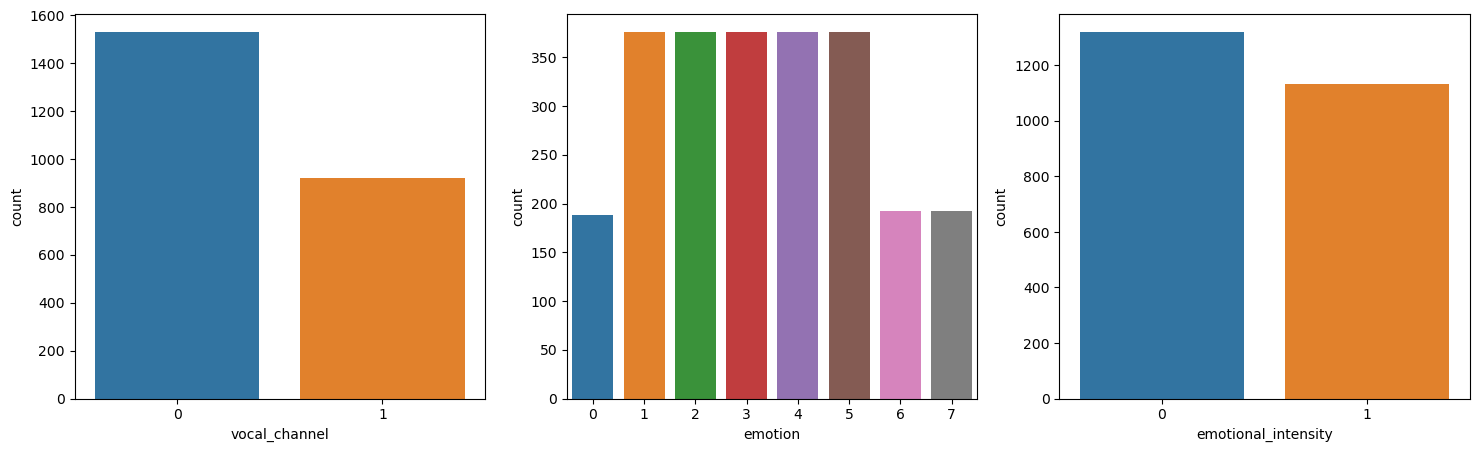

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,5)) #checking the distribution

sns.countplot(data=df_nostat, x="emotional_intensity", ax= ax3)

sns.countplot(data=df_nostat, x="vocal_channel", ax= ax1)

sns.countplot(data=df_nostat, x="emotion", ax= ax2)

#plt.legend(labels = ["norm. = 0" , "strong = 1"] , title = "legend") - you can add a legend to a single one with this line

array([[<AxesSubplot:title={'center':'vocal_channel'}>,
        <AxesSubplot:title={'center':'emotion'}>,
        <AxesSubplot:title={'center':'emotional_intensity'}>,
        <AxesSubplot:title={'center':'statement'}>],
       [<AxesSubplot:title={'center':'repetition'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'channels'}>,
        <AxesSubplot:title={'center':'sample_width'}>],
       [<AxesSubplot:title={'center':'frame_rate'}>,
        <AxesSubplot:title={'center':'frame_width'}>,
        <AxesSubplot:title={'center':'length_ms'}>,
        <AxesSubplot:title={'center':'frame_count'}>],
       [<AxesSubplot:title={'center':'intensity'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

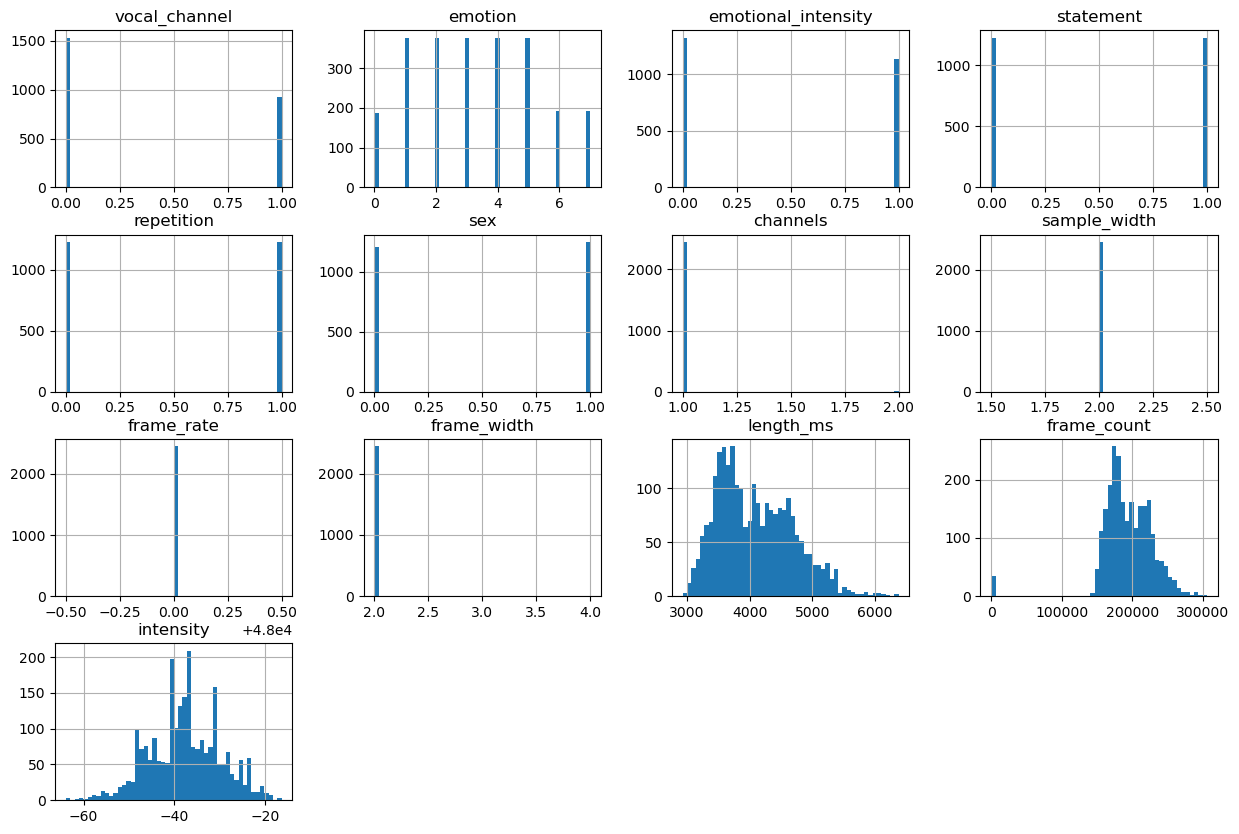

In [38]:
df_nostat.hist(bins = 50, figsize = (15,10))

In [39]:
out_channels = df_nostat[df_nostat["channels"] > 1]
out_channels

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity
index,,,,,,,,,,,,,
288,0,5,0,0,1,0,2,2,48000,4,4371,209809.0,-48.653291
779,0,1,0,0,1,1,2,2,48000,4,3604,172972.0,-50.222571
1046,0,7,0,1,1,1,2,2,48000,4,3270,156956.0,-43.304038
1337,1,0,0,0,0,0,2,2,48000,4,4771,229029.0,-39.834069
1349,0,2,0,1,0,0,2,2,48000,4,3470,166566.0,-40.756993
1810,0,1,0,1,1,1,2,2,48000,4,4238,203403.0,-50.663574


In [40]:
out_fram_width = df_nostat[df_nostat["frame_width"] > 2] 
out_fram_width

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity
index,,,,,,,,,,,,,
288,0,5,0,0,1,0,2,2,48000,4,4371,209809.0,-48.653291
779,0,1,0,0,1,1,2,2,48000,4,3604,172972.0,-50.222571
1046,0,7,0,1,1,1,2,2,48000,4,3270,156956.0,-43.304038
1337,1,0,0,0,0,0,2,2,48000,4,4771,229029.0,-39.834069
1349,0,2,0,1,0,0,2,2,48000,4,3470,166566.0,-40.756993
1810,0,1,0,1,1,1,2,2,48000,4,4238,203403.0,-50.663574


In [41]:
out_frame_count = df_nostat[df_nostat["frame_count"] < 10]
out_frame_count

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,sample_width,frame_rate,frame_width,length_ms,frame_count,intensity
index,,,,,,,,,,,,,
273,1,2,0,1,1,0,1,2,48000,2,4838,-1.0,-32.727081
301,0,1,0,1,0,0,1,2,48000,2,3637,-1.0,-35.790766
456,0,1,1,0,0,1,1,2,48000,2,3704,-1.0,-52.356457
459,0,1,1,0,0,1,1,2,48000,2,3670,-1.0,-47.596807
671,0,3,1,0,0,0,1,2,48000,2,3670,-1.0,-40.716249
677,0,2,0,0,0,0,1,2,48000,2,3504,-1.0,-44.375695
693,0,3,1,1,0,0,1,2,48000,2,4204,-1.0,-40.716249
714,1,5,1,0,0,1,1,2,48000,2,4004,-1.0,-35.938965
837,1,0,0,0,0,1,1,2,48000,2,4338,-1.0,-42.561202


<AxesSubplot:xlabel='channels', ylabel='index'>

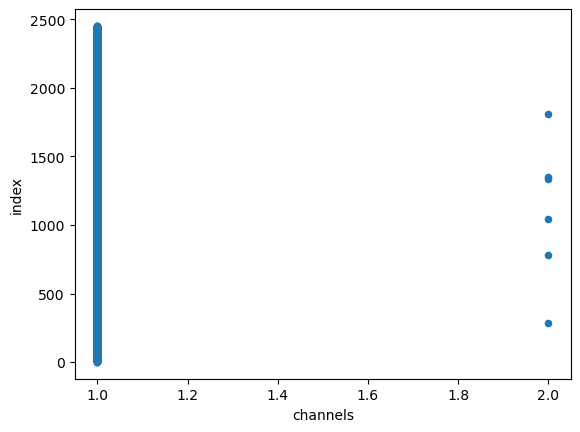

In [42]:
df_nostat.reset_index()[["channels", "index"]].plot(kind = "scatter", x = "channels" , y = "index")

<AxesSubplot:xlabel='frame_width', ylabel='index'>

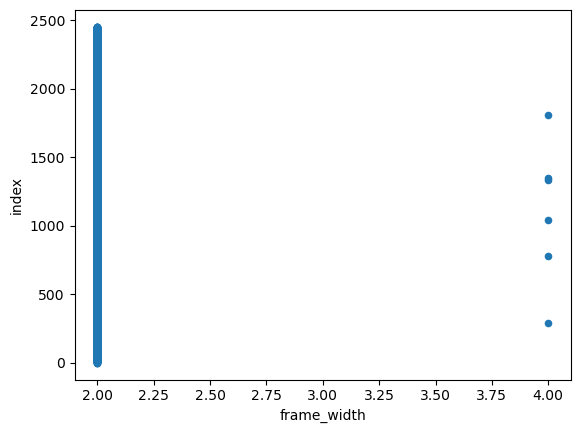

In [43]:
df_nostat.reset_index()[["frame_width", "index"]].plot(kind = "scatter", x = "frame_width" , y = "index")

<AxesSubplot:xlabel='frame_count', ylabel='index'>

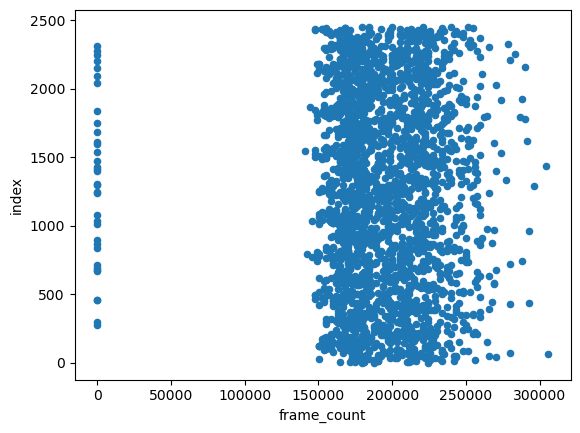

In [44]:
df_nostat.reset_index()[["frame_count", "index"]].plot(kind = "scatter", x = "frame_count" , y = "index")

CHECKING FOR UNNECESSARY VALUES AND DROPPING THEM

In [45]:
print(pd.unique(df_nostat["channels"])) #checking for unique values
print(pd.unique(df_nostat["frame_width"])) #checking for unique values
print(pd.unique(df_nostat["sample_width"])) #checking for unique values
print(pd.unique(df_nostat["frame_rate"])) #checking for unique values

[1 2]
[2 4]
[2]
[48000]


In [46]:
df_nostat.drop(["sample_width","frame_rate"], axis = 1, inplace=True)

df_nostat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 1 to 2452
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   int64  
 1   emotion              2452 non-null   int64  
 2   emotional_intensity  2452 non-null   int64  
 3   statement            2452 non-null   int64  
 4   repetition           2452 non-null   int64  
 5   sex                  2452 non-null   int64  
 6   channels             2452 non-null   int64  
 7   frame_width          2452 non-null   int64  
 8   length_ms            2452 non-null   int64  
 9   frame_count          2452 non-null   float64
 10  intensity            2452 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 229.9 KB


channels and framewidth errors are 100 correlated to each other so we are further investigating on them - [TO-DO]

In [47]:
out_channels.corrwith(out_fram_width)

vocal_channel          1.0
emotion                1.0
emotional_intensity    NaN
statement              1.0
repetition             1.0
sex                    1.0
channels               NaN
sample_width           NaN
frame_rate             NaN
frame_width            NaN
length_ms              1.0
frame_count            1.0
intensity              1.0
dtype: float64

i have to know what to do with frame_count the -1 is clearly a registration error of the value of some sort

In [48]:
df_nostat.corr(method="pearson").style.background_gradient(cmap='coolwarm',
                                                               vmin=-1, vmax=1, axis=None,).format(precision=3)

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,frame_width,length_ms,frame_count,intensity
vocal_channel,1.000,-0.228,-0.010,0.006,0.009,0.031,-0.021,-0.021,0.724,0.553,0.289
emotion,-0.228,1.000,0.126,0.000,0.000,-0.005,-0.016,-0.016,-0.267,-0.188,0.222
emotional_intensity,-0.010,0.126,1.000,-0.000,0.000,-0.000,-0.046,-0.046,0.114,0.092,0.406
statement,0.006,0.000,-0.000,1.000,-0.000,0.000,-0.000,-0.000,-0.030,-0.057,0.035
repetition,0.009,0.000,0.000,-0.000,1.000,-0.000,0.017,0.017,0.016,0.027,0.015
sex,0.031,-0.005,-0.000,0.000,-0.000,1.000,-0.001,-0.001,-0.072,-0.056,-0.067
channels,-0.021,-0.016,-0.046,-0.000,0.017,-0.001,1.000,1.000,-0.011,-0.005,-0.050
frame_width,-0.021,-0.016,-0.046,-0.000,0.017,-0.001,1.000,1.000,-0.011,-0.005,-0.050
length_ms,0.724,-0.267,0.114,-0.030,0.016,-0.072,-0.011,-0.011,1.000,0.763,0.269
frame_count,0.553,-0.188,0.092,-0.057,0.027,-0.056,-0.005,-0.005,0.763,1.000,0.198


Logical correlation - plotting - yestat
---

no missing values in the statistical part

In [49]:
df_result = pd.merge(df_nostat, df_yestat, left_index= True, right_index= True)
df_result

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,5,0,1,1,0,1,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.000000,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.000000,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
2,0,4,0,1,0,0,1,2,3904,187387.0,-36.663681,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.000000,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.000000,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
3,0,2,1,1,1,0,1,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.000000,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.000000,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
4,0,7,0,0,0,0,1,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.000000,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.000000,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
5,1,2,1,1,1,0,1,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.000000,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.000000,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,0,1,1,0,0,1,1,2,4605,221021.0,-47.596807,9871,-30.225578,158.845500,-855.92420,208.18497,5886.647366,4114.260257,0.000000,12210.517144,-1.588861,0.184390,0.573838,0.304496,0.000000,1.0,-1.075888,-0.310088,9.367040e-07,0.005260,-0.039856,0.052399,9.551363,0.759247
2449,0,1,0,1,0,1,1,2,4171,200200.0,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,6602.742127,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,0.591010,0.306333,0.000000,1.0,-1.026071,-0.408018,4.614221e-07,0.006836,-0.064178,0.084045,22.517991,1.073633
2450,1,3,1,1,1,1,1,2,5239,251451.0,-36.772456,9765,-26.135280,138.133210,-768.36536,235.53938,4654.156076,4231.511986,0.000000,12207.179884,-1.337419,0.619346,0.467994,0.347843,0.000000,1.0,-1.473789,0.130310,-8.219263e-06,0.015384,-0.093079,0.097260,4.964319,-0.005821


In [50]:
df_result.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,channels,frame_width,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,5,0,1,1,0,1,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,5792.550744,3328.055457,0.0,13541.959028,-1.120769,0.250940,0.415250,0.335533,0.0,1.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
2,0,4,0,1,0,0,1,2,3904,187387.0,-36.663681,13906,-29.502108,130.485630,-713.98560,205.00770,5197.620555,4040.931570,0.0,12000.290443,-1.531204,0.219582,0.417488,0.352380,0.0,1.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
3,0,2,1,1,1,0,1,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,4830.743037,3332.131300,0.0,12007.751173,-1.130153,0.436699,0.379758,0.352270,0.0,1.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
4,0,7,0,0,0,0,1,2,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,5376.446478,4053.663073,0.0,12048.223893,-1.497765,0.098802,0.407277,0.360552,0.0,1.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
5,1,2,1,1,1,0,1,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,5146.012474,3442.724109,0.0,12025.582707,-1.167544,0.496066,0.415974,0.350655,0.0,1.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [51]:
df_yestat.corr(method="pearson").style.background_gradient(cmap='coolwarm',
                                                               vmin=-1, vmax=1, axis=None,).format(precision=3)

,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_mean,stft_std,stft_min,stft_max,stft_kur,stft_skew,mean,std,min,max,kur,skew
zero_crossings_sum,1.000,0.130,-0.559,0.501,-0.449,-0.073,-0.374,0.190,-0.041,0.187,0.140,-0.407,0.115,-0.195,nan,0.073,0.446,0.020,0.470,-0.421,0.417,-0.118,0.201
mfcc_mean,0.130,1.000,-0.620,0.607,0.172,-0.282,-0.593,0.401,-0.375,0.358,0.253,0.313,-0.354,0.199,nan,0.020,-0.185,0.005,0.565,-0.591,0.583,0.112,0.053
mfcc_std,-0.559,-0.620,1.000,-0.976,0.438,0.370,0.525,-0.132,0.226,-0.454,-0.474,0.366,-0.230,0.281,nan,0.066,-0.411,-0.003,-0.845,0.816,-0.811,0.108,-0.360
mfcc_min,0.501,0.607,-0.976,1.000,-0.397,-0.285,-0.454,0.110,-0.193,0.368,0.360,-0.307,0.225,-0.276,nan,-0.075,0.331,-0.007,0.842,-0.829,0.823,-0.013,0.392
mfcc_max,-0.449,0.172,0.438,-0.397,1.000,0.151,0.209,0.077,0.001,-0.249,-0.310,0.573,-0.497,0.385,nan,0.012,-0.524,0.009,-0.383,0.339,-0.324,0.233,-0.089
sc_mean,-0.073,-0.282,0.370,-0.285,0.151,1.000,0.530,0.129,0.415,-0.626,-0.823,0.562,-0.323,0.178,nan,-0.008,-0.637,-0.002,-0.218,0.174,-0.170,0.282,0.027
sc_std,-0.374,-0.593,0.525,-0.454,0.209,0.530,1.000,-0.447,0.594,-0.620,-0.402,0.086,0.200,-0.055,nan,-0.232,-0.226,-0.015,-0.428,0.423,-0.407,-0.001,0.114
sc_min,0.190,0.401,-0.132,0.110,0.077,0.129,-0.447,1.000,-0.236,0.018,-0.092,0.348,-0.433,0.356,nan,0.110,-0.245,-0.006,0.158,-0.151,0.140,0.066,-0.157
sc_max,-0.041,-0.375,0.226,-0.193,0.001,0.415,0.594,-0.236,1.000,-0.206,-0.170,-0.009,0.121,-0.092,nan,-0.098,-0.071,-0.022,-0.180,0.183,-0.167,0.021,0.127
sc_kur,0.187,0.358,-0.454,0.368,-0.249,-0.626,-0.620,0.018,-0.206,1.000,0.771,-0.330,0.060,-0.112,nan,0.231,0.427,0.015,0.373,-0.347,0.348,-0.107,0.050


In [52]:
df_yestat.nunique()

zero_crossings_sum    2176
mfcc_mean             2451
mfcc_std              2449
mfcc_min              2451
mfcc_max              2449
sc_mean               2451
sc_std                2451
sc_min                1431
sc_max                2423
sc_kur                2451
sc_skew               2451
stft_mean             2451
stft_std              2451
stft_min              1431
stft_max                 1
stft_kur              2451
stft_skew             2451
mean                  2450
std                   2451
min                   2148
max                   2166
kur                   2451
skew                  2451
dtype: int64

we have to plot and find the correlations, if any, of the continous vallues with the categorical ones so the nostat w yestat

<AxesSubplot:xlabel='emotion', ylabel='intensity'>

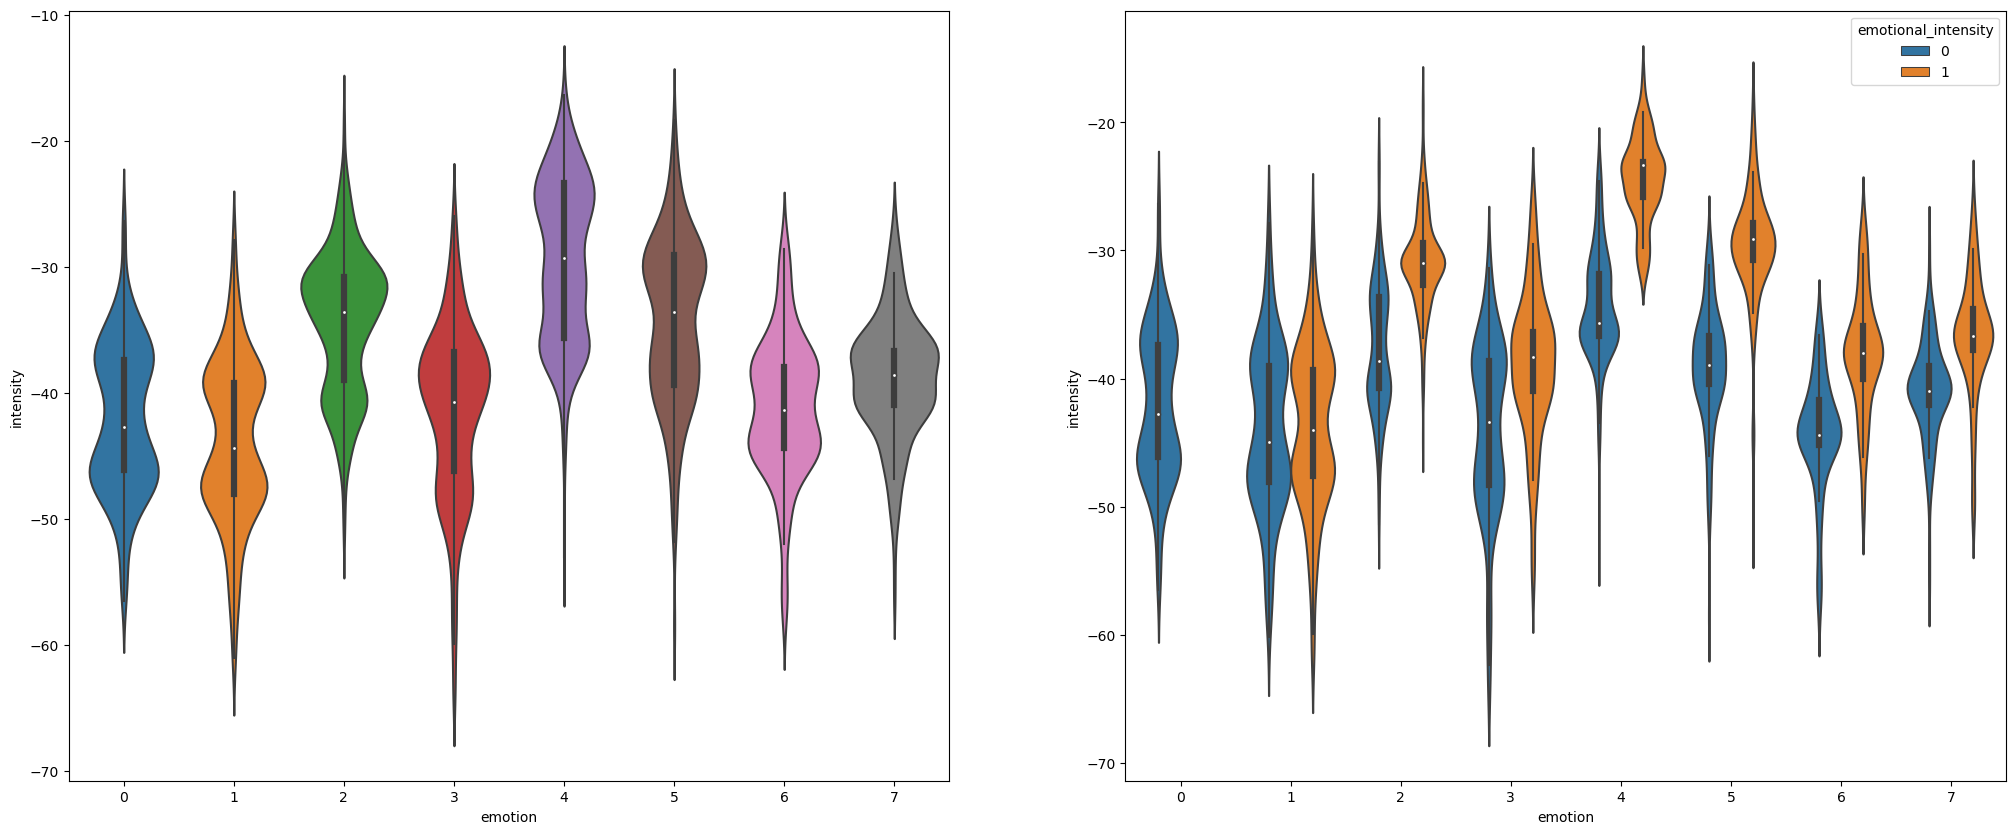

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25,10)) #checking the distribution

sns.violinplot( x='emotion',y='intensity', data=df_nostat, ax = ax1)
sns.violinplot( x='emotion',y='intensity', hue = "emotional_intensity",data=df_nostat, ax = ax2)



<AxesSubplot:xlabel='sex', ylabel='intensity'>

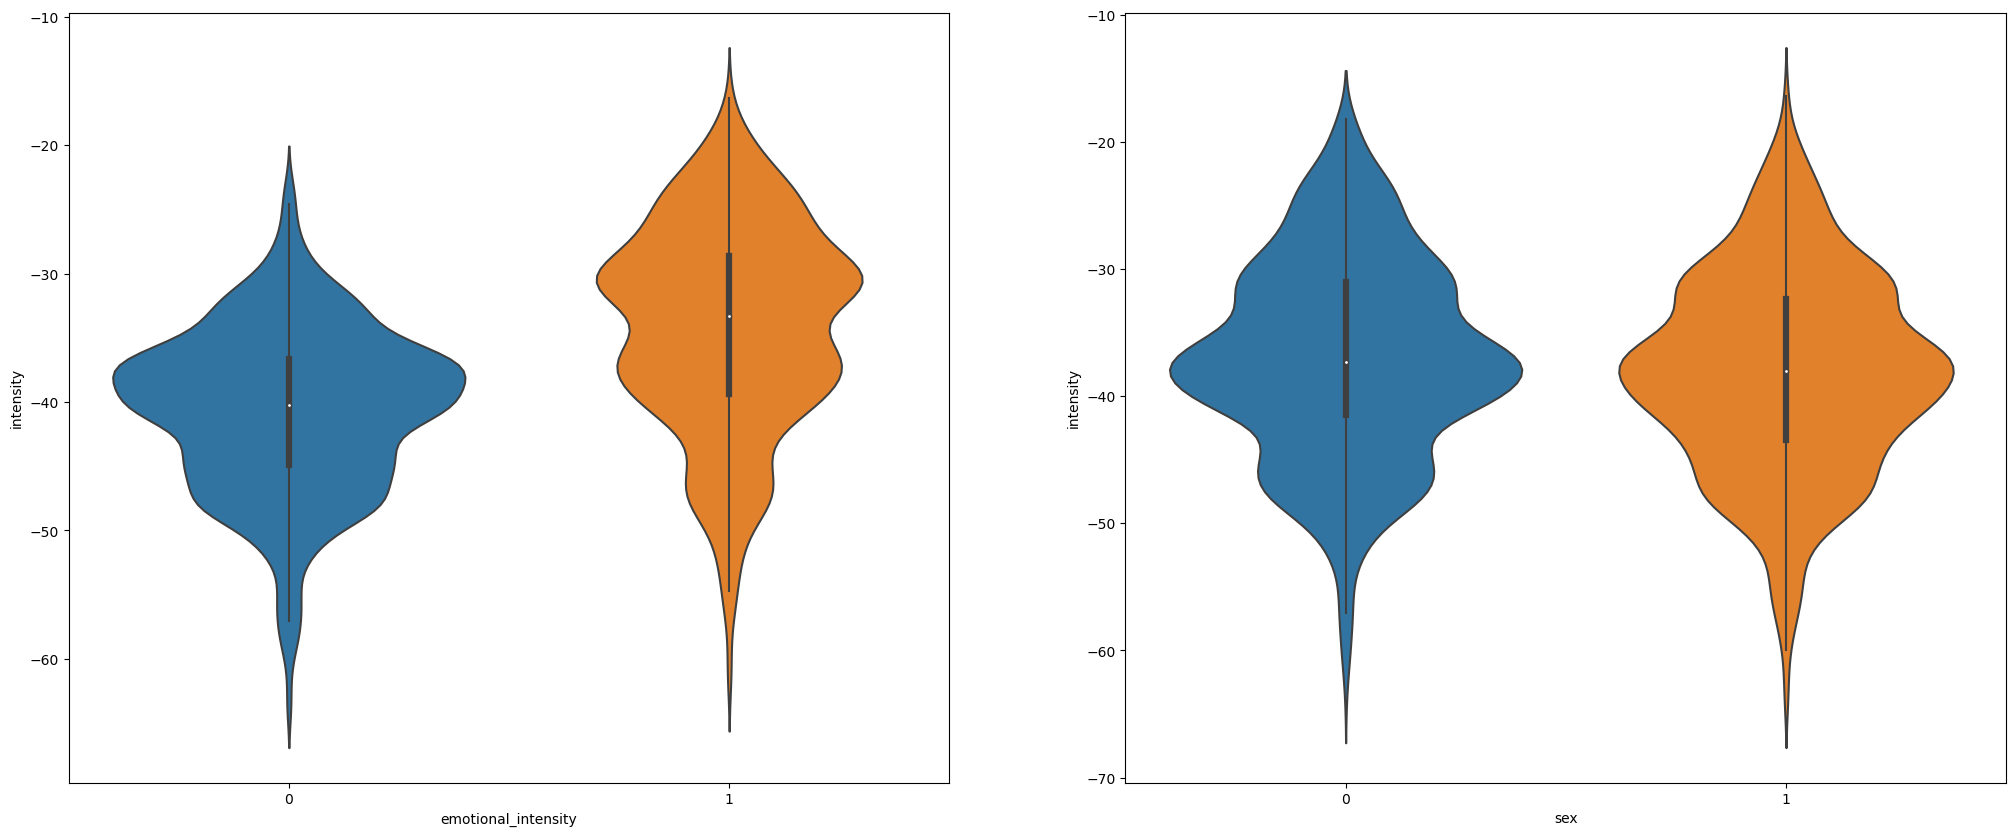

In [75]:
fig, ( ax3, ax4) = plt.subplots(1, 2, figsize = (25,10)) #checking the distribution

sns.violinplot( x='emotional_intensity',y='intensity', data=df_nostat, ax = ax3)
sns.violinplot( x='sex',y='intensity',data=df_nostat, ax = ax4)

<AxesSubplot:xlabel='emotion', ylabel='stft_mean'>

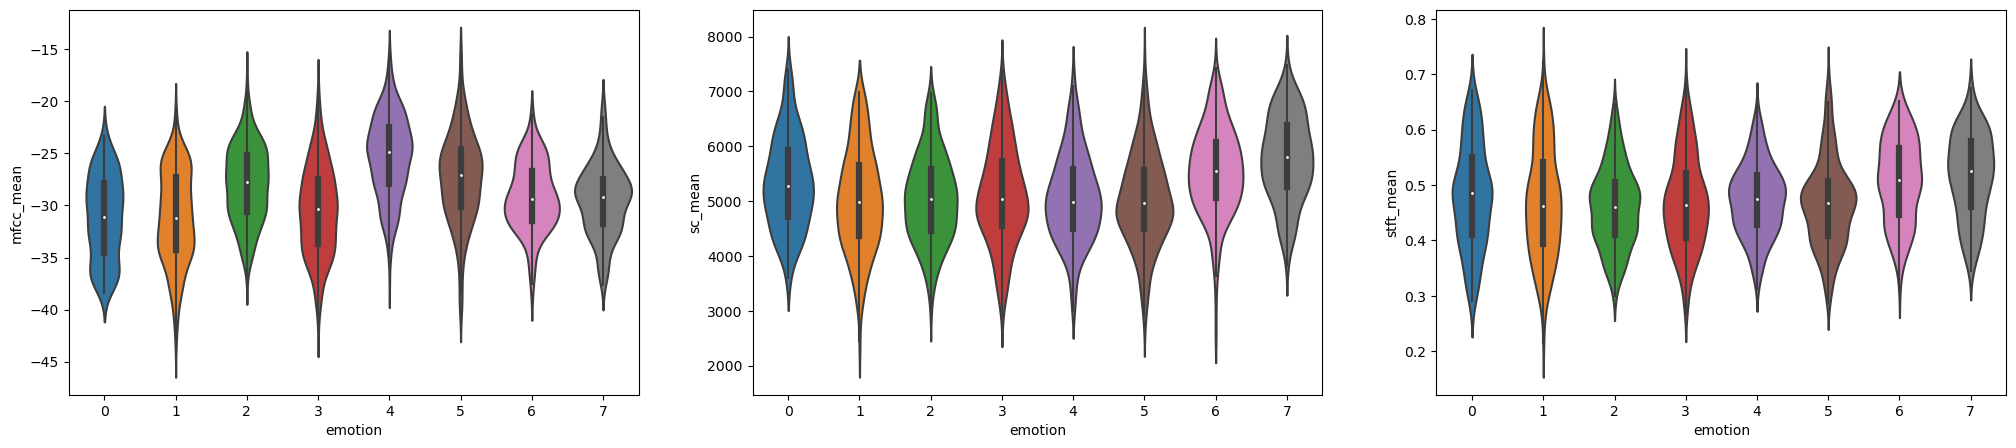

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,5)) #checking the distribution

sns.violinplot( y='mfcc_mean',x='emotion',data=df_result, ax = ax1)

sns.violinplot( y='sc_mean',x='emotion',data=df_result, ax = ax2)

sns.violinplot( y='stft_mean',x='emotion',data=df_result, ax = ax3)


In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25,5)) #checking the distribution

sns.histplot( y='mfcc_mean',hue='intensity',data=df_result, ax = ax1)

sns.histplot( y='sc_mean',hue='intensity',data=df_result, ax = ax2)

sns.histplot( y='stft_mean',hue='intensity',data=df_result, ax = ax3)

<AxesSubplot:xlabel='Count', ylabel='stft_mean'>

/Users/vincenzorocchi/opt/anaconda3/envs/DataMining/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7fe691da4dc0> (for post_execute):


KeyboardInterrupt: 

the violin plot let use see that the distribution 

In [ ]:
sns.violinplot( x='emotion',y='stft_mean',data=df_result
               )
plt.show()

In [ ]:
sns.boxplot(df= df_result, x= "vocal_channel", )

In [ ]:
df_yestat.hist(bins = 50, figsize = (15,10))

In [ ]:
df_yestat.describe()